In [1]:
#gerekli kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/ervabilen/Desktop/students-performance EDA/StudentsPerformance.csv")

# Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)

**Değişkenler:**

1. **gender:** Öğrencinin cinsiyeti. (female/male)
2. **race/ethnicity:** Öğrencinin ırkı veya etnik kökeni. (group A/B/C/D/E)
3. **parental level of education:** Öğrencinin ebeveynlerinin eğitim düzeyi. (some college/associate's degree/high school/some high school/bachelor's degree/master's degree)
4. **lunch:** Öğrencinin öğle yemeği durumu ((free/reduced)/standard).
5. **test preparation course:** Öğrencinin sınav öncesi hazırlık kursuna katılıp katılmadığı. (none/completed)
6. **math score:** Öğrencinin matematik sınavındaki puanı.
7. **reading score:** Öğrencinin okuma sınavındaki puanı.
8. **writing score:** Öğrencinin yazma sınavındaki puanı.

Bu veri seti, öğrencilerin sınav performanslarını çeşitli demografik ve akademik faktörlere göre analiz etmek için kullanılabilir. Cinsiyet, ırk, ebeveyn eğitim düzeyi gibi faktörlerin öğrencilerin sınav performansları üzerindeki etkilerini incelemek amacıyla analizler yapılabilir.




In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
def sum_df(dataframe):
    print("====================== Shape =======================")
    print(dataframe.shape)
    print("\n==================== Columns =====================")
    print(dataframe.columns)
    print("\n==================== Info ======================")
    dataframe.info()
    print("====================== Types ======================")
    print(dataframe.dtypes)
    print("====================== NA ======================")
    print(dataframe.isnull().sum())

In [6]:
sum_df(df)

====================== Shape =======================
(1000, 8)

==================== Columns =====================
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

==================== Info ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score            

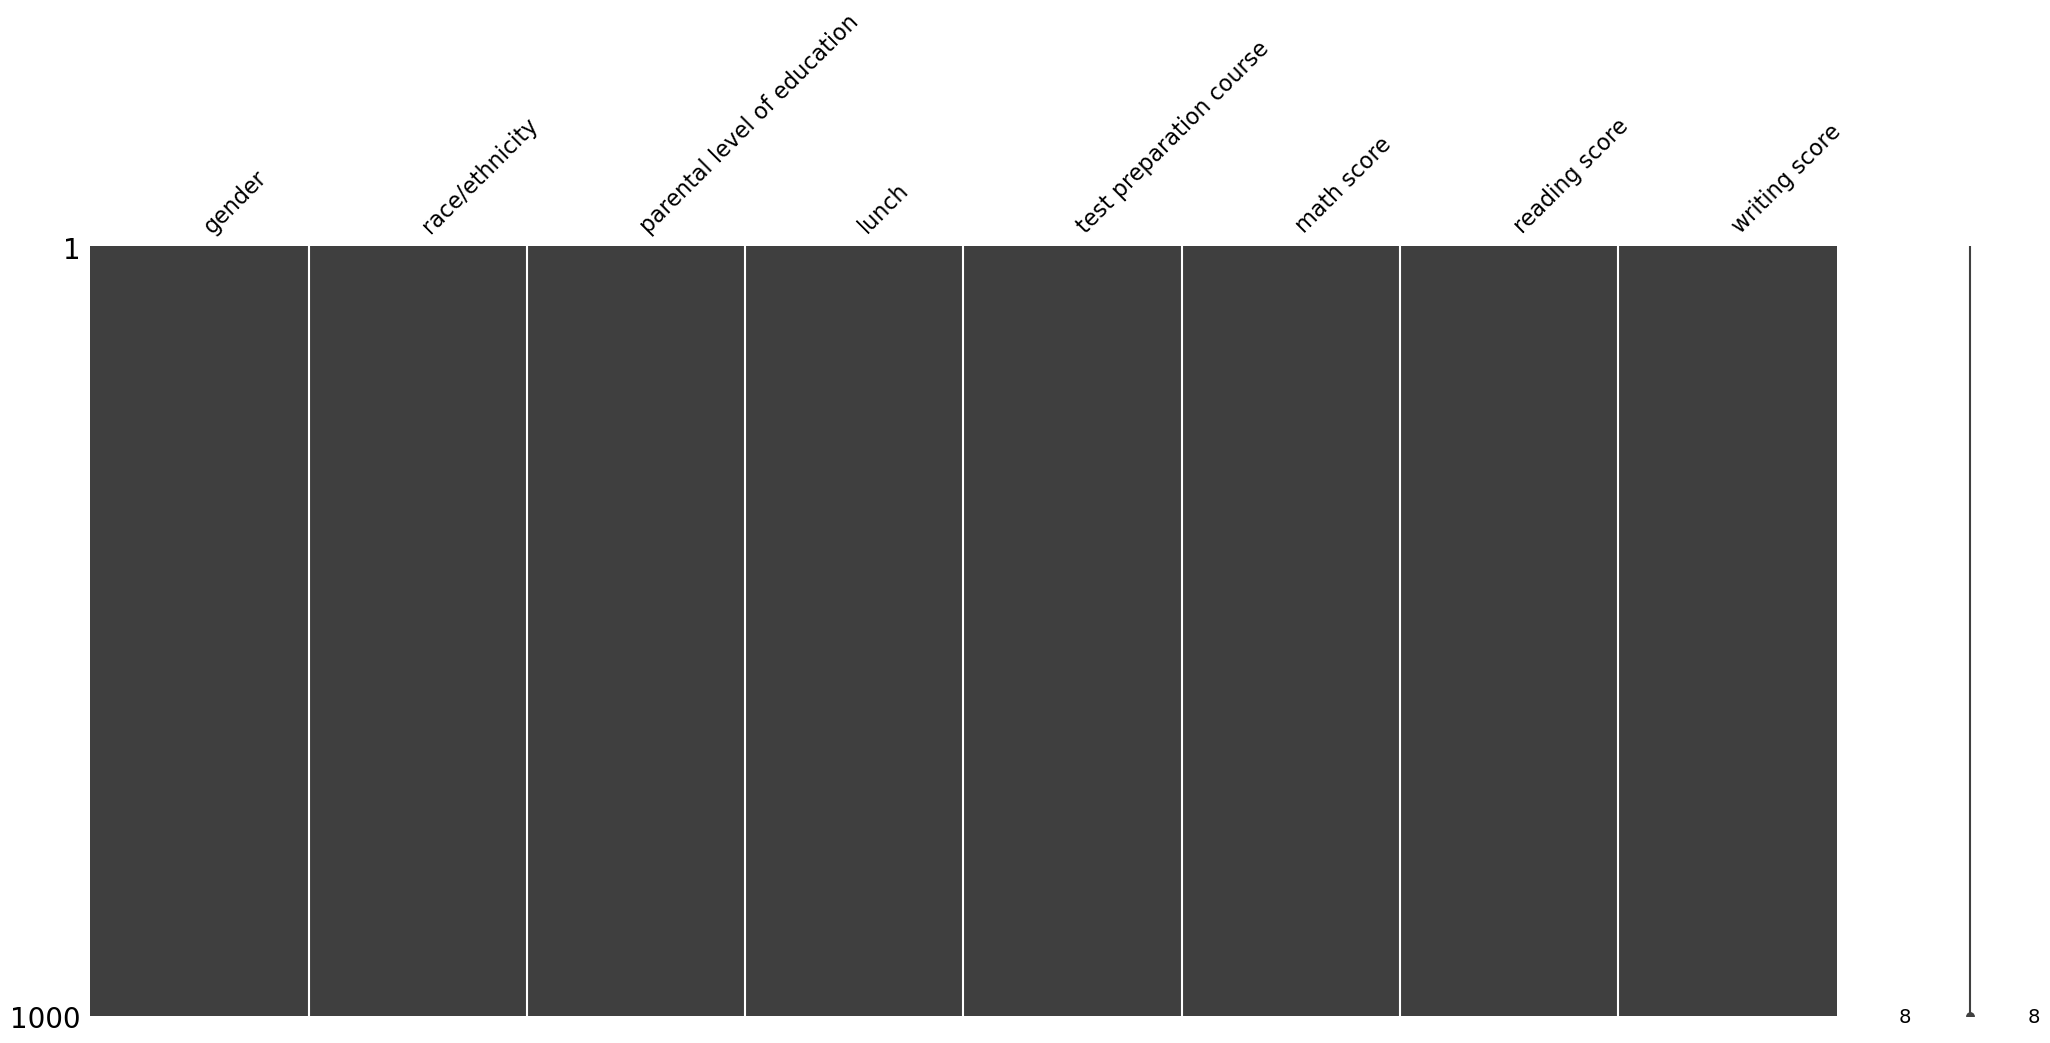

In [7]:
#eksik verilerin görselleştirilmesi
msno.matrix(df)
plt.show()

In [8]:
#tekrar eden veri kontrolü
df.duplicated().sum()

0

In [9]:
#tekrar eden satır kontrolü
df.loc[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


* veri setinde terkar eden değer bulunmamaktadır

In [10]:
#kategorik değişkenler
print("==================================")
print(df["race/ethnicity"].value_counts())
print("==================================")
print(df["parental level of education"].value_counts())
print("==================================")
print(df["lunch"].value_counts())
print("==================================")
print(df["test preparation course"].value_counts())
print("==================================")

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course
none         642
completed    358
Name: count, dtype: int64


In [11]:
#özet istatistikler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0



* Diğer derslerle karşılaştırdığımızda matematik dersinin ortalama notu daha düşük olduğunu gözlemliyoruz.
* En yüksek ders notu reading dersine ait.

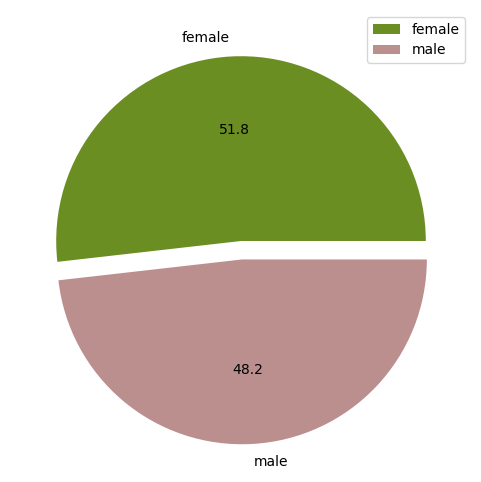

In [12]:
#veri setindeki kadın ve erkek oranı
labels = ["female","male"]
count = df["gender"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(count, labels = labels, autopct='%.1f', explode=(0,0.1), colors=['olivedrab', 'rosybrown'])
plt.legend(labels = labels)
plt.show()

* Veri setinde kadın öğrenci sayısı erkek öğrencilerden daha fazla olduğu gözlenmektedir.

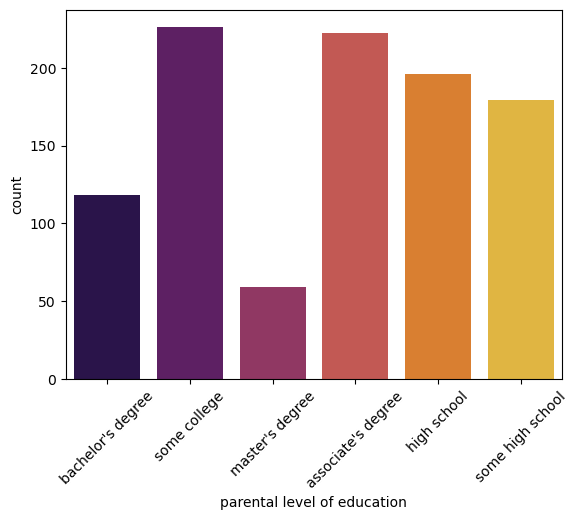

In [13]:
#ebeveynlerin eğitim düzeylerinin dağılımı
sns.countplot(data = df, x = "parental level of education", palette = "inferno")
plt.xticks(rotation=45)
plt.show()

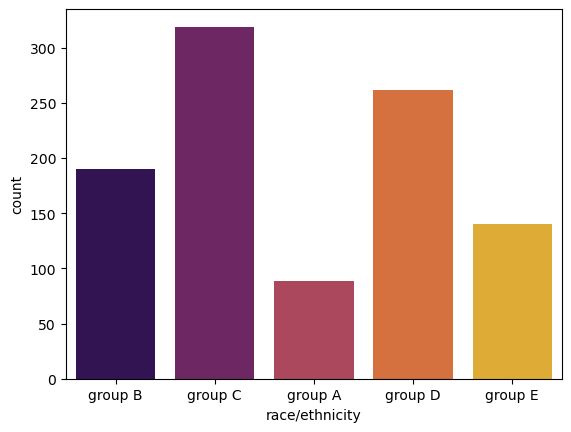

In [14]:
#ırkların dağılımı
sns.countplot(data=df, x = "race/ethnicity", palette="inferno")
plt.show()

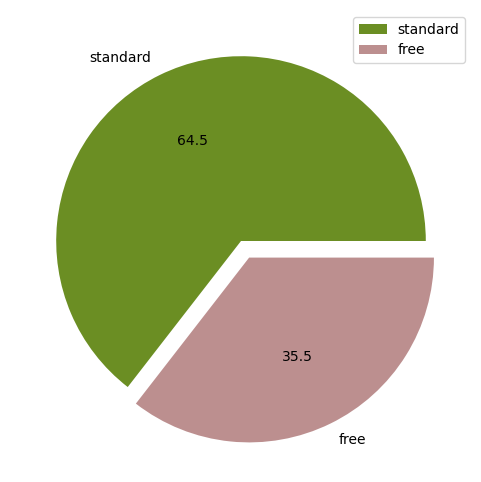

In [15]:
#veri setindeki öğle yemeği oranı
labels = ["standard","free"]
count = df["lunch"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(count, labels = labels, autopct='%.1f', explode=(0,0.1), colors=['olivedrab', 'rosybrown'])
plt.legend(labels = labels)
plt.show()

In [16]:
# ebeveyn eğitim düzeylerine göre üç dersin ortalaması
df.groupby("parental level of education")[["reading score", "writing score", "math score"]].mean()

,reading score,writing score,math score
parental level of education,,,
associate's degree,70.927928,69.896396,67.882883
bachelor's degree,73.000000,73.381356,69.389831
high school,64.704082,62.448980,62.137755
master's degree,75.372881,75.677966,69.745763
some college,69.460177,68.840708,67.128319
some high school,66.938547,64.888268,63.497207


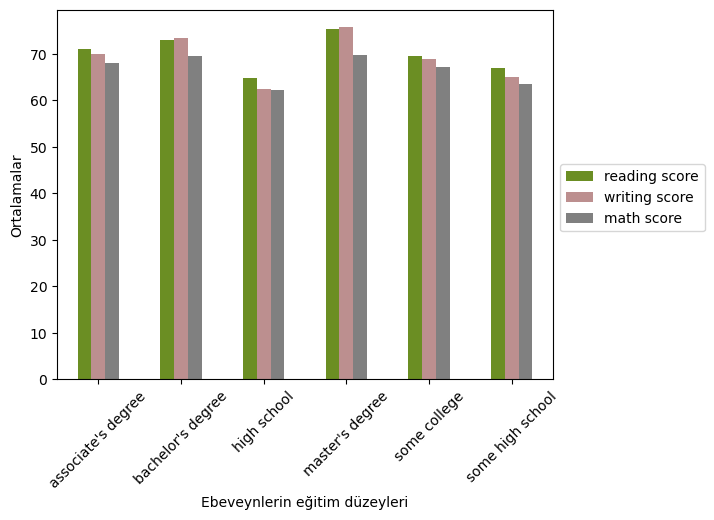

In [17]:
# ebeveyn eğitim düzeylerine göre üç dersin ortalamasının grafiği
xx=df.groupby("parental level of education")[["reading score", "writing score", "math score"]].mean()
xx.plot(kind = "bar", color = [ "olivedrab","rosybrown","gray"])
plt.legend(bbox_to_anchor = (1, 0.6))
plt.xlabel("Ebeveynlerin eğitim düzeyleri")
plt.ylabel("Ortalamalar")
plt.xticks(rotation=45)
plt.show()

* Özellikle reading ve writing skorları ebeveynleri yüksek lisans yapmış olan öğrencilerin daha yüksektir.


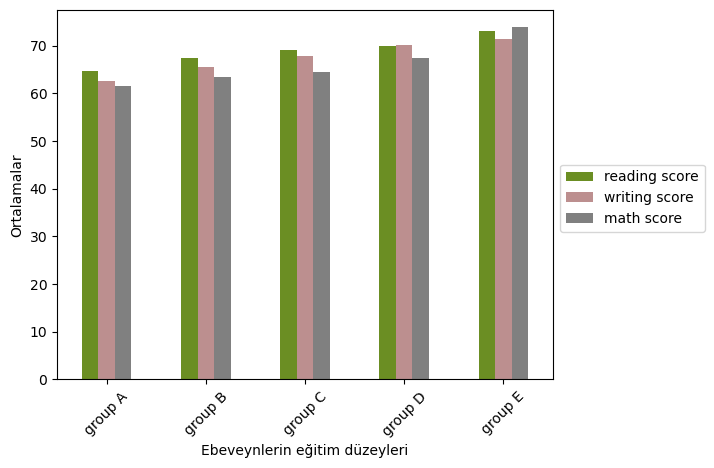

In [18]:
#ırklara göre üç dersin ortalamasının grafiği
xy = df.groupby("race/ethnicity")[["reading score", "writing score", "math score"]].mean()
xy.plot(kind = "bar", color = [ "olivedrab","rosybrown","gray"])
plt.legend(bbox_to_anchor = (1, 0.6))
plt.xlabel("Ebeveynlerin eğitim düzeyleri")
plt.ylabel("Ortalamalar")
plt.xticks(rotation=45)
plt.show()

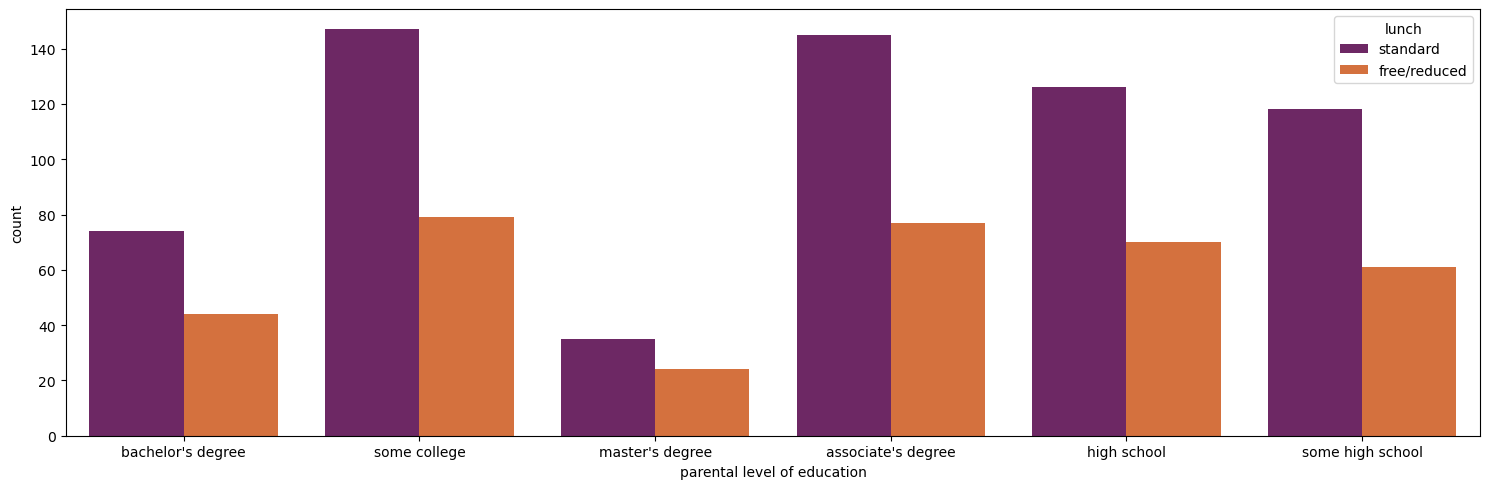

In [40]:
#öğrencinin öğle yemeği türü ile ebeveynlerin eğitim durumları arasındaki ilişkiyi inceleyelim
plt.figure(figsize=(15, 5))
sns.countplot(data = df, x = "parental level of education", hue = "lunch", palette="inferno")
plt.tight_layout()
plt.show()

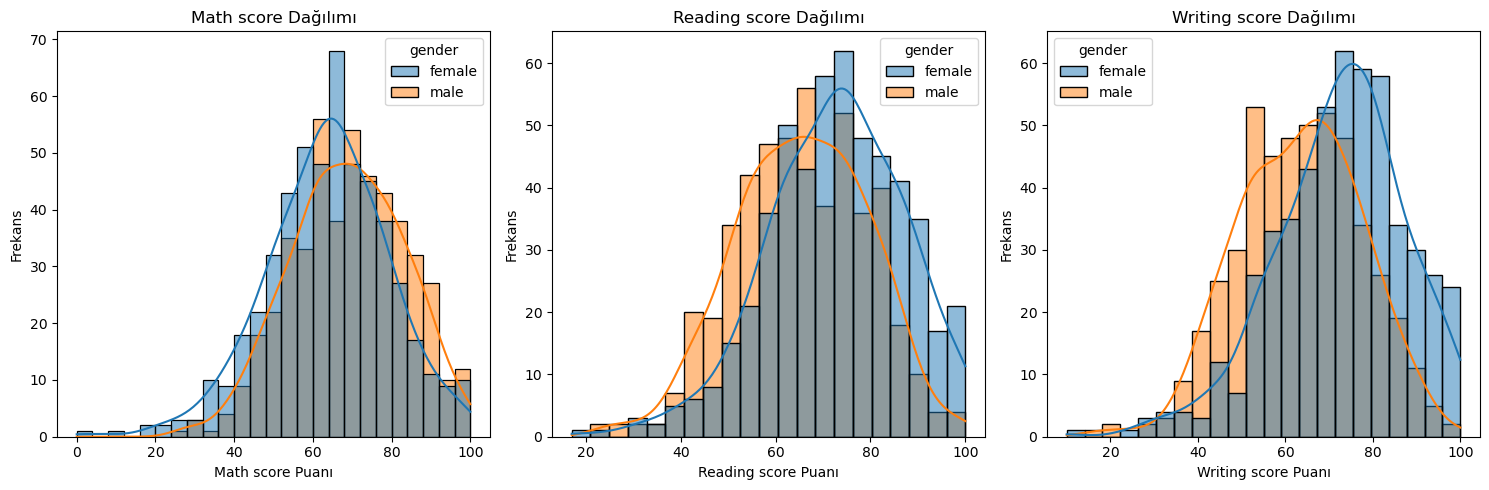

In [20]:
#cinsiyete göre ders notlarının dağılımı
plt.figure(figsize=(15, 5))

variables = ["math score", "reading score", "writing score"]

for i, var in enumerate(variables, start=1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=var, hue='gender', kde=True)
    plt.title(f'{var.capitalize()} Dağılımı')
    plt.xlabel(f'{var.capitalize()} Puanı')
    plt.ylabel('Frekans')

plt.tight_layout()
plt.show()

* Reading ve writing derslerinde kadın öğrencilerin notları daha yüksek iken matematik dersinde erkek öğrencilerin notları daha yüksek olduğu gözlenmektedir.

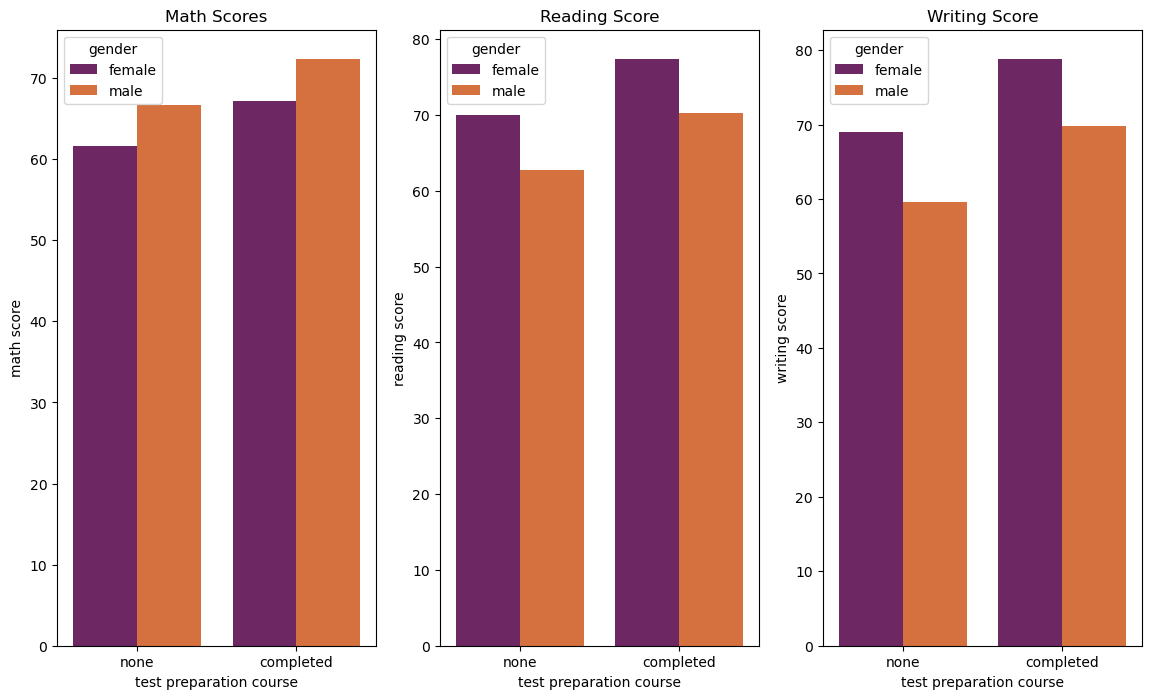

In [21]:
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
sns.barplot(data = df, x = "test preparation course", y = "math score", hue = "gender", palette="inferno", errorbar = None)
plt.title("Math Scores")
plt.subplot(1, 3, 2)
sns.barplot(data = df, x="test preparation course", y = "reading score", hue = "gender",palette="inferno", errorbar = None)
plt.title("Reading Score")
plt.subplot(1, 3, 3)
sns.barplot(data =df,x="test preparation course", y = "writing score", hue = "gender",palette = "inferno", errorbar = None)
plt.title("Writing Score")
plt.show()

* Hazırlık kursunu alan öğrenciler almayanlara göre daha yüksek notlara sahip olduğu gözlenmektedir.

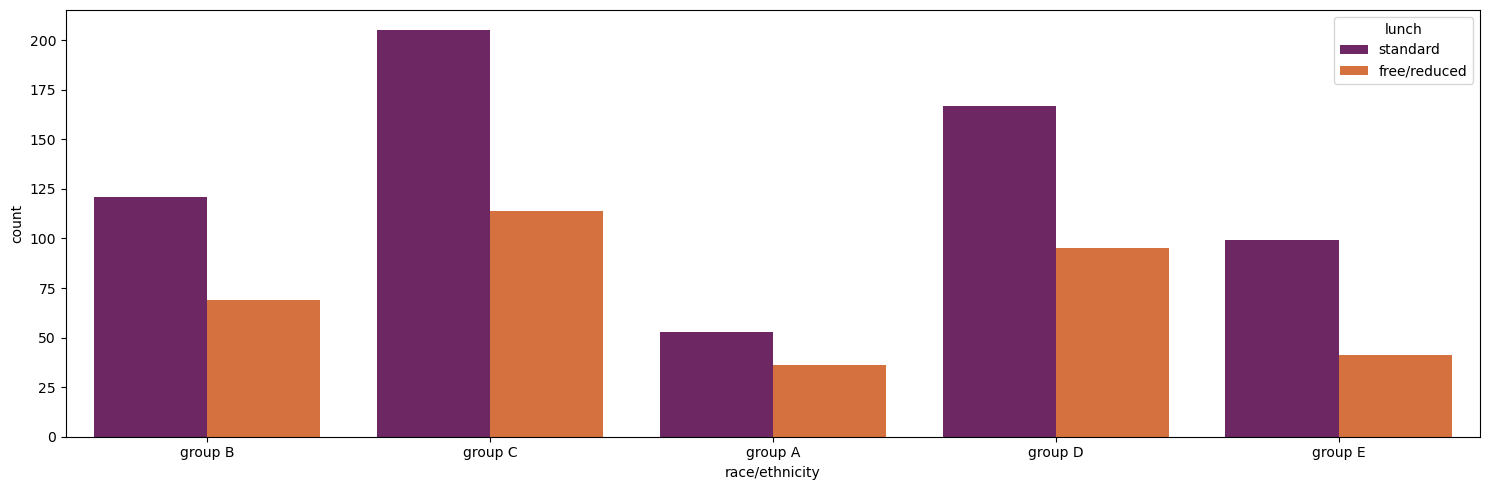

In [41]:
#ırka göre ile öğle yemeği türlerinin dağılımı
plt.figure(figsize=(15, 5))
sns.countplot(data = df, x = "race/ethnicity", hue = "lunch", palette="inferno")
plt.tight_layout()
plt.show()

# Değişkenler Arası İlişkilerin Analizi

**Korelasyon Analizi:**

İki veya daha çok değişkenin arasında ilişkinin yönünü ve derecesinin korelasyon analizi ile tespit ederiz. Korelasyon katsayısı -1 ile +1 arasında değer alır. Eğer bu değer -1'e yakınsa **negatif korelasyon** (değişkenlerden biri artarken diğeri azalır), +1'e yakınsa **pozitif korelasyon** (bir değişken artarken diğer değişken de artar) ve 0'a yakın olduğunda ise **zayıf korelasyon** (değişkenler arasındaki ilişki çok düşük/yok) anlamına gelmektedir.


In [23]:
df_corr = df[['math score', 'reading score', 'writing score']]
df_corr.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [24]:
df_corr = df_corr.corr()

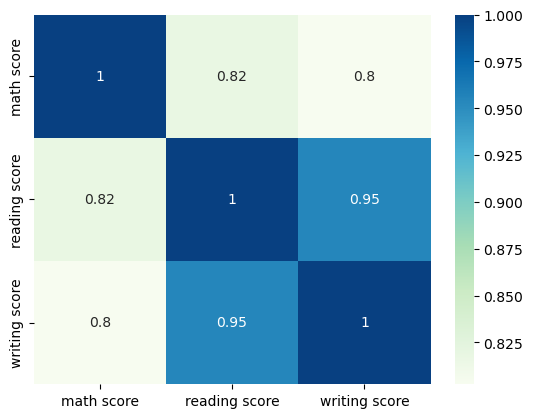

In [25]:
sns.heatmap(data = df_corr, annot = True, cmap = 'GnBu')
plt.show()

* Bu ısı haritasında reading ve writing skorları arasında güçlü bir ilişki yani pozitif korelasyon olduğu gözlenmektedir.

# Feature Engineering

**Aykırı Değer Tespiti**

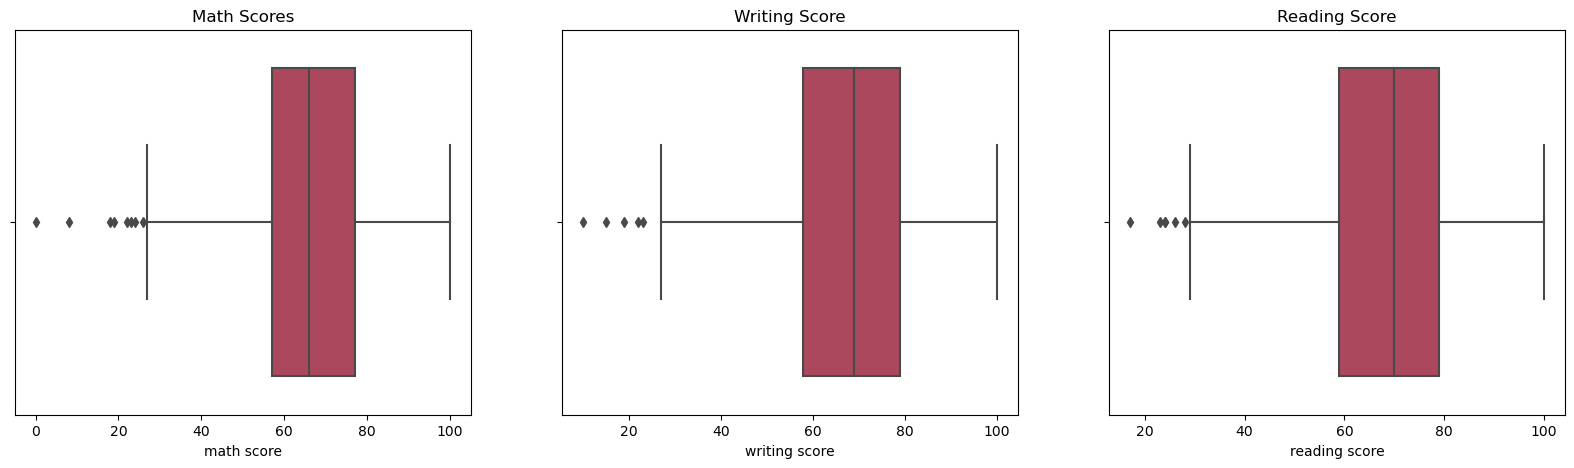

In [26]:
#boxplot yöntemi ile tespit
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = df["math score"], palette="inferno")
plt.title("Math Scores")
plt.subplot(1,3,2)
sns.boxplot(x = df["writing score"], palette="inferno")
plt.title("Writing Score")
plt.subplot(1, 3, 3)
sns.boxplot(x=df["reading score"], palette="inferno")
plt.title("Reading Score")
plt.show(block=True)

**IQR Yöntemi:**


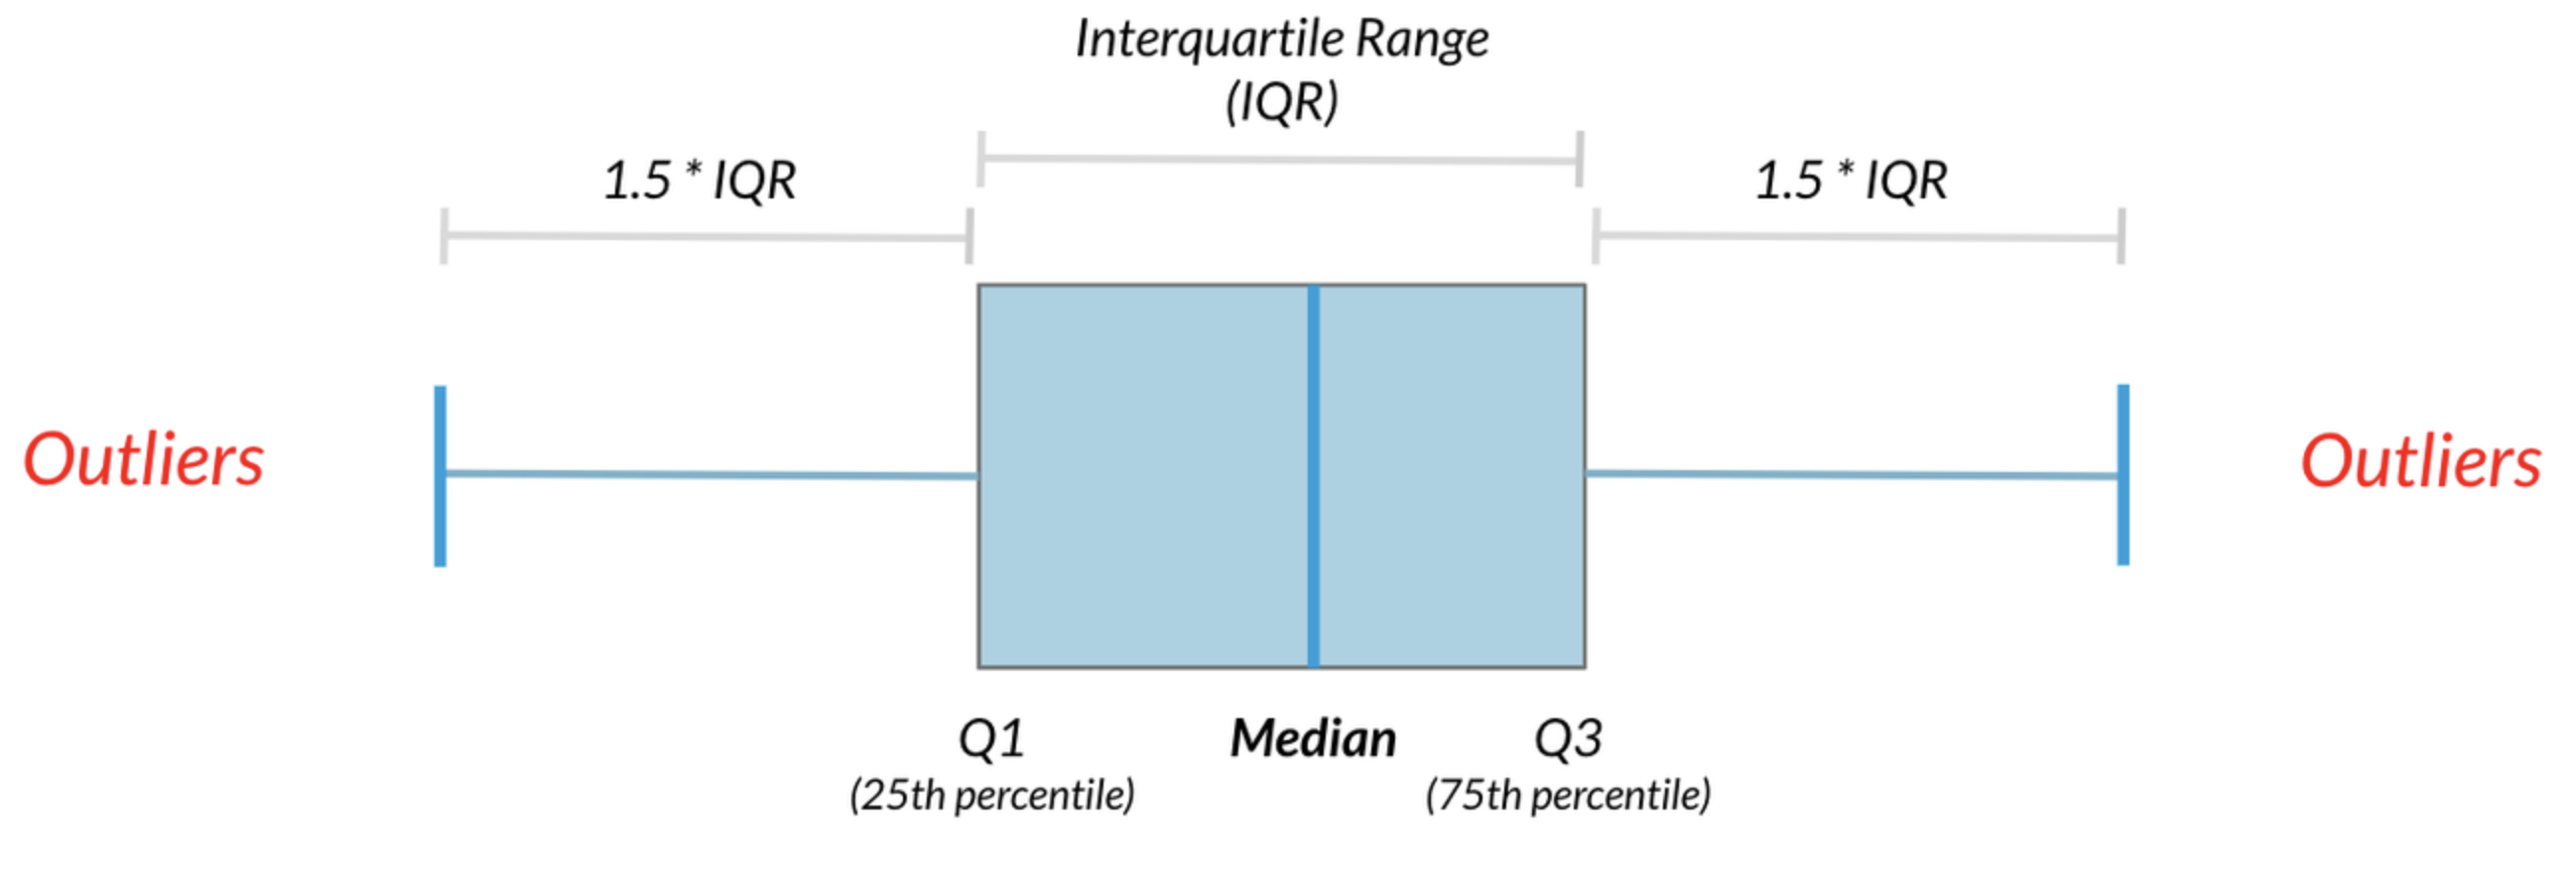
kaynak: https://www.linkedin.com/pulse/refining-insights-unveiling-power-outlier-management-data-abuzar-tkchf/

In [27]:
#ilk çeyrekteki değerler
Q1 = df["math score"].quantile(0.25)
#üçüncü çeyrekteki değerler
Q3 = df["math score"].quantile(0.75)
#IQR değerini hesaplayalım
IQR = Q3-Q1
#alt limit
low = Q1-1.5*IQR
#üst limit
up = Q3+1.5*IQR

In [28]:
low

27.0

In [29]:
up

107.0

In [30]:
#bir döngü ile hesaplama yapmak için
def outlier_thresholds(df,col,q1=0.25,q3=0.75):
  Q1 = df[col].quantile(q1)
  Q3 = df[col].quantile(q3)
  IQR = Q1-Q3
  up_limit = Q3+1.5*IQR
  low_limit = Q1-1.5*IQR
  return up_limit, low_limit

In [31]:
outlier_thresholds(df,"math score")

(47.0, 87.0)

In [32]:
outlier_thresholds(df, "writing score")

(47.125, 89.625)

In [33]:
outlier_thresholds(df, "reading score")

(49.0, 89.0)

In [34]:
def check_outliers(df,col,q1=0.25,q3=0.75):
  up_limit, low_limit = outlier_thresholds(df,col,q1=0.25,q3=0.75)
  if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [35]:
check_outliers(df,"math score")

True

In [36]:
check_outliers(df,"reading score")

True

In [37]:
check_outliers(df,"writing score")

True


* Üç sayısal değişkende de aykırı değer gözlenmektedir.

  **Çözümler:**
*  Aykırı değer probleminden kurtulmak için farklı yöntemler kullanılır. Uygulanacak en basit yöntemlerden biri aykırı gözlemlerin silinmesidir. Fakat bu yöntem veri setinin değişkenliğini etkileyebilir.
* Silme yöntemi dışında değer atama yöntemiyle aykırı değerler yerine değişkenin ortalaması, modu, medyanı gibi istatistikler atanabilir.
* Ayrıca baskılama yöntemiyle de üst sınıra yakın olan aykırı değerler üst sınıra, alt sınıra yakın alan aykırı değerler de alt sınıra eşitlenebilir.

**Eksik Değer Tespiti:**

In [38]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Veri setinde eksik değer bulunmamakta fakat bulunsaydı bunlardan kurtulmak için aykırı gözlemlerde yapıldığı gibi silinebilir veya değer atanabilirdi. Fakat eksik değerleri silerken çok dikkat edilmelidir çünkü eksik değeri silmek modelde yanlılığa sebep olabilir.